<a href="https://colab.research.google.com/github/ahnjihyun/Project-Prediction-of-renal-failure/blob/main/AI_01_%EC%95%88%EC%A7%80%ED%98%84_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 데이터 선정 배경
- 신장질환 환자 증가율이 세계4위 (현재 국내 만성신부전증 환자수는 **약 10만명**)
- 신부전증은 초기 발견이 어려울뿐만 아니라 
- 증상이 심할 경우 지속적인 투석 혹은 장기 이식을 해야함. 
- 이것은 환자의 건강에도 치명적이고, 치료할 시 의료비용이 상당히 많이 들어 부담이 됨
- 만성 신장질환의 **조기발견 및 관리**의 중요성이 점점 더 커지고 있음


# 2. 분석 목표
- 많은 기관들이 혈청 크레아티닌 (Scr)을 신기능 저하의 선별검사로 사용하고 있음
- 이를 신장기능의 지표중 하나인 **"혈청 크레아티닌" 수치로 신부전증을 예측**하고자 함
- 가설 : "시력/혈압/혈당/간기능/흡연유무가 신장기능에 Negative한 영향을 미칠것이다" 
> - 데이터 셋은 [공공 데이터 포털] > [2019 국민건강보험공단_건강검진정보]
>
> https://www.data.go.kr/data/15007122/fileData.do


# (관련 설명)

간과 신장은 우리 몸에서 독소를 제거하고 노폐물을 배설하는 등의 해독 작용을 하는 장기로, 두 장기 모두 50% 이상 손상되어도 자각 증상이 없이 ‘침묵의 장기’로 불린다. **간과 신장은 대부분 회복이 불가능할 정도로 질병이 많이 진행된 후에 발견된다.**

> 관련 기사 : https://biz.chosun.com/site/data/html_dir/2018/05/29/2018052902388.html

우리나라도 **만 35세 이상 국민 7명 중 1명이 만성 콩팥병 환자**로 세계에서 여섯 번째로 신부전 환자 증가율이 높은 국가다. 지난 2011년 11만3400여명이던 만성콩팥병 환자는 2015년 17만명으로 늘었다. 이에 따라 **국민 의료비 부담도 빠르게 증가하고 있다.**

신장질환은 그로 인한 진료비가 **1조 5671억원(2015년 기준)에 달해 사회적 부담이 높고 환자군도 빠르게 증가하는 추세로 각별한 주의를 요하고 있다.**

신장이 망가지면 말기 신부전으로 이어져 일주일에 몇 차례씩 병원을 찾아 투석 치료를 받아야 한다. 말기 신부전의 경우 실질적인 완치의 길은 결국 신장이식 수술을 받는 방법 밖에 없다.

질환이 더 진행되면 투석이나 신장 이식이 불가피하기 때문에 조기 발견 및 관리가 무엇보다도 중요하다.

만성 신질환의 진행을 지연시키는데 있어 만성 신질환의 **조기발견 및 관리의 중요성이 점점 더 커지고 있다.**
**많은 기관들이 혈청 크레아티닌 (Scr)을 신기능 저하의 선별검사로 사용하고 있어**
혈청 크레아티닌 수치 예측으로 신부전증 조기 파악을 하고자 한다. 


# 3. 데이터 랭글링

### 데이터 로드 (구글 드라이브 사용)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/2019국민건강검진정보.csv'

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
tr = pd.read_csv(path, encoding='cp949')

tr.head()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석,데이터 공개일자
0,2019,1,11,1,13,165,65,90.0,1.5,1.2,1.0,1.0,112.0,70.0,93.0,NaN,NaN,NaN,NaN,15.5,1.0,1.0,18.0,32.0,47.0,2.0,NaN,1,0.0,미시행,미시행,미시행,1.0,20191231
1,2019,2,48,2,5,155,45,64.0,1.2,0.5,1.0,1.0,114.0,76.0,89.0,NaN,NaN,NaN,NaN,14.0,1.0,0.5,15.0,8.0,13.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
2,2019,3,41,1,13,160,70,87.0,0.9,0.8,1.0,1.0,109.0,73.0,100.0,232.0,114.0,57.0,152.0,15.6,1.0,1.0,30.0,21.0,17.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
3,2019,4,28,1,12,170,60,85.0,0.4,1.2,1.0,1.0,131.0,85.0,85.0,NaN,NaN,NaN,NaN,14.5,1.0,0.7,17.0,19.0,32.0,2.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
4,2019,5,41,1,10,170,70,81.2,0.7,0.7,1.0,1.0,112.0,66.0,91.0,NaN,NaN,NaN,NaN,14.9,1.0,0.9,19.0,24.0,19.0,2.0,NaN,0,NaN,미시행,미시행,미시행,NaN,20191231


### 데이터 EDA (1차) : 타겟 예측에 불필요한 컬럼들 삭제

In [ ]:
tr.shape

(1000000, 34)

- 피처가 34개, 샘플이 10만개나 되는 데이터지만 타겟 예측에 불필요한 데이터도 많을것같다. 아래에서 확인해보면

In [ ]:
tr.describe().T

,count,mean,std,min,25%,50%,75%,max
기준년도,1000000.0,2.019000e+03,0.000000,2019.00,2019.00,2019.0,2019.00,2019.0
가입자 일련번호,1000000.0,5.000005e+05,288675.278933,1.00,250000.75,500000.5,750000.25,1000000.0
시도코드,1000000.0,3.371239e+01,12.668197,11.00,27.00,41.0,43.00,50.0
성별코드,1000000.0,1.480426e+00,0.499617,1.00,1.00,1.0,2.00,2.0
연령대 코드(5세단위),1000000.0,1.049639e+01,2.964080,5.00,8.00,11.0,13.00,18.0
신장(5Cm단위),1000000.0,1.623077e+02,9.280317,130.00,155.00,160.0,170.00,195.0
체중(5Kg 단위),1000000.0,6.356449e+01,12.877611,30.00,55.00,60.0,70.00,145.0
허리둘레,999597.0,8.132056e+01,10.523122,3.00,74.00,81.0,88.00,999.0
시력(좌),999805.0,9.719088e-01,0.593307,0.10,0.70,1.0,1.20,9.9
시력(우),999812.0,9.709511e-01,0.600537,0.10,0.70,1.0,1.20,9.9


In [ ]:
tr.isnull().sum()

기준년도                  0
가입자 일련번호              0
시도코드                  0
성별코드                  0
연령대 코드(5세단위)          0
신장(5Cm단위)             0
체중(5Kg 단위)            0
허리둘레                403
시력(좌)               195
시력(우)               188
청력(좌)               181
청력(우)               178
수축기 혈압             5424
이완기 혈압             5425
식전혈당(공복혈당)         5523
총 콜레스테롤          666451
트리글리세라이드         666456
HDL 콜레스테롤        666459
LDL 콜레스테롤        672852
혈색소                5532
요단백               10306
혈청크레아티닌            5526
(혈청지오티)AST         5522
(혈청지오티)ALT         5523
감마 지티피             5530
흡연상태                166
음주여부             355082
구강검진 수검여부             0
치아우식증유무          602320
결손치 유무                0
치아마모증유무               0
제3대구치(사랑니) 이상         0
치석               602320
데이터 공개일자              0
dtype: int64

- 위에서 '기준년도', '가입자 일련번호' 등의 컬럼은 타겟과 무관하기때문에 삭제한다
- '총 콜레스테롤' ~ 'LDL 콜레스테롤' 4개의 컬럼은 결측치가 너무 많아 제거하기로 한다(결측치가 약 66만개)
- '치아우식증여부' ~ '데이터공개일자' 컬럼들은 신장 기능과 무관하다고 판단하여 제거한다

In [ ]:
# 타겟 예측에 불필요한 컬럼들 삭제
train = tr.drop(['기준년도', '가입자 일련번호', '시도코드', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤', '치아우식증유무', '결손치 유무', '치아마모증유무', '제3대구치(사랑니) 이상', '치석', '데이터 공개일자'], axis=1)

In [ ]:
train.shape

(1000000, 21)

### 데이터 EDA (2차) : '흡연상태', '음주여부' 어떻게 처리할지 결정

In [ ]:
train.isnull().sum()

성별코드                 0
연령대 코드(5세단위)         0
신장(5Cm단위)            0
체중(5Kg 단위)           0
허리둘레               403
시력(좌)              195
시력(우)              188
청력(좌)              181
청력(우)              178
수축기 혈압            5424
이완기 혈압            5425
식전혈당(공복혈당)        5523
혈색소               5532
요단백              10306
혈청크레아티닌           5526
(혈청지오티)AST        5522
(혈청지오티)ALT        5523
감마 지티피            5530
흡연상태               166
음주여부            355082
구강검진 수검여부            0
dtype: int64

샘플 수가 충분하기 때문에 
- '음주여부' 결측치 처리를 해결한 뒤에 
- 결측값이 있는 샘플은 모두 삭제하기로 한다.

In [ ]:
train.groupby(train['음주여부']).size()

음주여부
0.0        18
1.0    644900
dtype: int64

In [ ]:
train.groupby(train['흡연상태']).size()

흡연상태
1.0    630226
2.0    369608
dtype: int64

In [ ]:
train.head(10)

,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부
0,1,13,165,65,90.0,1.5,1.2,1.0,1.0,112.0,70.0,93.0,15.5,1.0,1.0,18.0,32.0,47.0,2.0,NaN,1
1,2,5,155,45,64.0,1.2,0.5,1.0,1.0,114.0,76.0,89.0,14.0,1.0,0.5,15.0,8.0,13.0,1.0,1.0,0
2,1,13,160,70,87.0,0.9,0.8,1.0,1.0,109.0,73.0,100.0,15.6,1.0,1.0,30.0,21.0,17.0,1.0,1.0,0
3,1,12,170,60,85.0,0.4,1.2,1.0,1.0,131.0,85.0,85.0,14.5,1.0,0.7,17.0,19.0,32.0,2.0,1.0,0
4,1,10,170,70,81.2,0.7,0.7,1.0,1.0,112.0,66.0,91.0,14.9,1.0,0.9,19.0,24.0,19.0,2.0,NaN,0
5,1,8,170,110,107.8,1.2,1.5,1.0,1.0,139.0,87.0,108.0,14.8,1.0,0.9,42.0,44.0,129.0,1.0,1.0,0
6,1,6,175,70,81.3,0.9,1.0,1.0,1.0,120.0,72.0,90.0,13.1,1.0,0.9,14.0,11.0,30.0,2.0,1.0,1
7,1,12,165,65,85.0,0.7,0.8,1.0,1.0,140.0,90.0,130.0,16.2,1.0,1.1,29.0,30.0,68.0,1.0,1.0,1
8,1,14,165,75,88.9,0.6,0.7,1.0,1.0,132.0,74.0,99.0,14.4,1.0,0.6,27.0,22.0,26.0,2.0,1.0,1
9,2,13,145,50,78.0,0.2,0.1,1.0,1.0,104.0,60.0,98.0,13.7,1.0,1.0,33.0,23.0,23.0,1.0,NaN,1


- 위 데이터를 보면 '음주 여부'에 null값이 355082개 / 0.0이 18개 / 1.0이 644900개인 것을 보아 
- 금주 == 0, 음주 == 1 로 보고 
- null을 전부 0으로 채운다 
---
- 금연 ==1, 흡연 == 2 로 보고
- 샘플이 충분하기 때문에 결측치가 있는 166개의 샘플은 삭제하기로 한다 

### 데이터 EDA (3차) : '허리둘레', '혈색소' 컬럼 반올림해서 소수점 없애기(float형인건 여전함)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 21 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   성별코드          1000000 non-null  int64  
 1   연령대 코드(5세단위)  1000000 non-null  int64  
 2   신장(5Cm단위)     1000000 non-null  int64  
 3   체중(5Kg 단위)    1000000 non-null  int64  
 4   허리둘레          999597 non-null   float64
 5   시력(좌)         999805 non-null   float64
 6   시력(우)         999812 non-null   float64
 7   청력(좌)         999819 non-null   float64
 8   청력(우)         999822 non-null   float64
 9   수축기 혈압        994576 non-null   float64
 10  이완기 혈압        994575 non-null   float64
 11  식전혈당(공복혈당)    994477 non-null   float64
 12  혈색소           994468 non-null   float64
 13  요단백           989694 non-null   float64
 14  혈청크레아티닌       994474 non-null   float64
 15  (혈청지오티)AST    994478 non-null   float64
 16  (혈청지오티)ALT    994477 non-null   float64
 17  감마 지티피        994470 non-nul

In [ ]:
# '허리둘레', '혈색소' 컬럼 반올림해서 소수점 없애기(float형인건 여전함)

def toInt(flo):
  if flo == None: # 결측치면 넘어감
    pass
  else:
    return round(flo, 0) # 값이 있으면 반올림


train['허리둘레'] = train['허리둘레'].apply(toInt)
train['혈색소'] = train['혈색소'].apply(toInt)

In [ ]:
# '허리둘레', '혈색소' 컬럼 반올림해서 소수점 없어진거 확인
train.head()

,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부
0,1,13,165,65,90.0,1.5,1.2,1.0,1.0,112.0,70.0,93.0,16.0,1.0,1.0,18.0,32.0,47.0,2.0,NaN,1
1,2,5,155,45,64.0,1.2,0.5,1.0,1.0,114.0,76.0,89.0,14.0,1.0,0.5,15.0,8.0,13.0,1.0,1.0,0
2,1,13,160,70,87.0,0.9,0.8,1.0,1.0,109.0,73.0,100.0,16.0,1.0,1.0,30.0,21.0,17.0,1.0,1.0,0
3,1,12,170,60,85.0,0.4,1.2,1.0,1.0,131.0,85.0,85.0,14.0,1.0,0.7,17.0,19.0,32.0,2.0,1.0,0
4,1,10,170,70,81.0,0.7,0.7,1.0,1.0,112.0,66.0,91.0,15.0,1.0,0.9,19.0,24.0,19.0,2.0,NaN,0


In [ ]:
# '허리둘레', '혈색소' 컬럼 아직 float 형임
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 21 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   성별코드          1000000 non-null  int64  
 1   연령대 코드(5세단위)  1000000 non-null  int64  
 2   신장(5Cm단위)     1000000 non-null  int64  
 3   체중(5Kg 단위)    1000000 non-null  int64  
 4   허리둘레          999597 non-null   float64
 5   시력(좌)         999805 non-null   float64
 6   시력(우)         999812 non-null   float64
 7   청력(좌)         999819 non-null   float64
 8   청력(우)         999822 non-null   float64
 9   수축기 혈압        994576 non-null   float64
 10  이완기 혈압        994575 non-null   float64
 11  식전혈당(공복혈당)    994477 non-null   float64
 12  혈색소           994468 non-null   float64
 13  요단백           989694 non-null   float64
 14  혈청크레아티닌       994474 non-null   float64
 15  (혈청지오티)AST    994478 non-null   float64
 16  (혈청지오티)ALT    994477 non-null   float64
 17  감마 지티피        994470 non-nul

### 데이터 EDA (4차) : '음주여부' 변경, 모든결측치 '9999'로 채움

In [ ]:
train.columns

Index(['성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)', '체중(5Kg 단위)', '허리둘레', '시력(좌)',
       '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압', '이완기 혈압', '식전혈당(공복혈당)', '혈색소',
       '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태', '음주여부',
       '구강검진 수검여부'],
      dtype='object')

In [ ]:
train.isnull().sum()

성별코드                 0
연령대 코드(5세단위)         0
신장(5Cm단위)            0
체중(5Kg 단위)           0
허리둘레               403
시력(좌)              195
시력(우)              188
청력(좌)              181
청력(우)              178
수축기 혈압            5424
이완기 혈압            5425
식전혈당(공복혈당)        5523
혈색소               5532
요단백              10306
혈청크레아티닌           5526
(혈청지오티)AST        5522
(혈청지오티)ALT        5523
감마 지티피            5530
흡연상태               166
음주여부            355082
구강검진 수검여부            0
dtype: int64

In [ ]:
train['음주여부'] = train['음주여부'].replace(0.0, 1) # 금주 : 기존 0.0 >> 변경 1
train['음주여부'] = train['음주여부'].replace(1.0, 2) # 음주 : 기존 1.0 >> 변경 2

In [ ]:
train['음주여부'] = train['음주여부'].fillna(1) # 결측치를 금주로 취급하여 1로 채움

In [ ]:
train.head()

,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부
0,1,13,165,65,90.0,1.5,1.2,1.0,1.0,112.0,70.0,93.0,16.0,1.0,1.0,18.0,32.0,47.0,2.0,1.0,1
1,2,5,155,45,64.0,1.2,0.5,1.0,1.0,114.0,76.0,89.0,14.0,1.0,0.5,15.0,8.0,13.0,1.0,2.0,0
2,1,13,160,70,87.0,0.9,0.8,1.0,1.0,109.0,73.0,100.0,16.0,1.0,1.0,30.0,21.0,17.0,1.0,2.0,0
3,1,12,170,60,85.0,0.4,1.2,1.0,1.0,131.0,85.0,85.0,14.0,1.0,0.7,17.0,19.0,32.0,2.0,2.0,0
4,1,10,170,70,81.0,0.7,0.7,1.0,1.0,112.0,66.0,91.0,15.0,1.0,0.9,19.0,24.0,19.0,2.0,1.0,0


In [ ]:
train.isnull().sum()

성별코드                0
연령대 코드(5세단위)        0
신장(5Cm단위)           0
체중(5Kg 단위)          0
허리둘레              403
시력(좌)             195
시력(우)             188
청력(좌)             181
청력(우)             178
수축기 혈압           5424
이완기 혈압           5425
식전혈당(공복혈당)       5523
혈색소              5532
요단백             10306
혈청크레아티닌          5526
(혈청지오티)AST       5522
(혈청지오티)ALT       5523
감마 지티피           5530
흡연상태              166
음주여부                0
구강검진 수검여부           0
dtype: int64

In [ ]:
train.groupby(train['음주여부']).size()

음주여부
1.0    355082
2.0    644918
dtype: int64

In [ ]:
train = train.fillna(9999) # 안쓸거같은 임의의 값(9999)을 모든 결측치에 넣음. 결측치가 있으면 컬럼별 형변환이 안돼서 일단 형변환(float to int)하기 위함

In [ ]:
train.isnull().sum()

성별코드            0
연령대 코드(5세단위)    0
신장(5Cm단위)       0
체중(5Kg 단위)      0
허리둘레            0
시력(좌)           0
시력(우)           0
청력(좌)           0
청력(우)           0
수축기 혈압          0
이완기 혈압          0
식전혈당(공복혈당)      0
혈색소             0
요단백             0
혈청크레아티닌         0
(혈청지오티)AST      0
(혈청지오티)ALT      0
감마 지티피          0
흡연상태            0
음주여부            0
구강검진 수검여부       0
dtype: int64

### 데이터 EDA (5차) : '연령대 코드' 특성으로 '나이' 특성 생성

In [ ]:
train.head()

,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부
0,1,13,165,65,90.0,1.5,1.2,1.0,1.0,112.0,70.0,93.0,16.0,1.0,1.0,18.0,32.0,47.0,2.0,1.0,1
1,2,5,155,45,64.0,1.2,0.5,1.0,1.0,114.0,76.0,89.0,14.0,1.0,0.5,15.0,8.0,13.0,1.0,2.0,0
2,1,13,160,70,87.0,0.9,0.8,1.0,1.0,109.0,73.0,100.0,16.0,1.0,1.0,30.0,21.0,17.0,1.0,2.0,0
3,1,12,170,60,85.0,0.4,1.2,1.0,1.0,131.0,85.0,85.0,14.0,1.0,0.7,17.0,19.0,32.0,2.0,2.0,0
4,1,10,170,70,81.0,0.7,0.7,1.0,1.0,112.0,66.0,91.0,15.0,1.0,0.9,19.0,24.0,19.0,2.0,1.0,0


In [ ]:
# '연령대 코드(5세단위)' 컬럼에 5를 곱해서 새로운 특성 만들기 
def toAge(int):
  a = int*5
  if (a % 10) == 0 :
    return a
  else: 
    return a-5

train['나이(5세단위)'] = train['연령대 코드(5세단위)'].apply(toAge)
train = train.drop('연령대 코드(5세단위)', axis=1)

# 컬럼 순서 바꾸기(원래 '연령대코드'가 있던 위치로 '나이'컬럼을 옮김)
train = train[['성별코드', '나이(5세단위)', '신장(5Cm단위)', '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)',
       '청력(우)', '수축기 혈압', '이완기 혈압', '식전혈당(공복혈당)', '혈색소', '요단백', '혈청크레아티닌',
       '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태', '음주여부', '구강검진 수검여부']]

train.head()

,성별코드,나이(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부
0,1,60,165,65,90.0,1.5,1.2,1.0,1.0,112.0,70.0,93.0,16.0,1.0,1.0,18.0,32.0,47.0,2.0,1.0,1
1,2,20,155,45,64.0,1.2,0.5,1.0,1.0,114.0,76.0,89.0,14.0,1.0,0.5,15.0,8.0,13.0,1.0,2.0,0
2,1,60,160,70,87.0,0.9,0.8,1.0,1.0,109.0,73.0,100.0,16.0,1.0,1.0,30.0,21.0,17.0,1.0,2.0,0
3,1,60,170,60,85.0,0.4,1.2,1.0,1.0,131.0,85.0,85.0,14.0,1.0,0.7,17.0,19.0,32.0,2.0,2.0,0
4,1,50,170,70,81.0,0.7,0.7,1.0,1.0,112.0,66.0,91.0,15.0,1.0,0.9,19.0,24.0,19.0,2.0,1.0,0


### 데이터 EDA (6차) : 모든 컬럼 float to int 형변환

In [ ]:
train.head(3)

,성별코드,나이(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부
0,1,60,165,65,90.0,1.5,1.2,1.0,1.0,112.0,70.0,93.0,16.0,1.0,1.0,18.0,32.0,47.0,2.0,1.0,1
1,2,20,155,45,64.0,1.2,0.5,1.0,1.0,114.0,76.0,89.0,14.0,1.0,0.5,15.0,8.0,13.0,1.0,2.0,0
2,1,60,160,70,87.0,0.9,0.8,1.0,1.0,109.0,73.0,100.0,16.0,1.0,1.0,30.0,21.0,17.0,1.0,2.0,0


In [ ]:
cols = ['허리둘레', '청력(좌)', '청력(우)', '수축기 혈압', '이완기 혈압', '식전혈당(공복혈당)', '혈색소', '요단백', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태', '음주여부']

train[cols] = train[cols].astype(int)

In [ ]:
train.head()

,성별코드,나이(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부
0,1,60,165,65,90,1.5,1.2,1,1,112,70,93,16,1,1.0,18,32,47,2,1,1
1,2,20,155,45,64,1.2,0.5,1,1,114,76,89,14,1,0.5,15,8,13,1,2,0
2,1,60,160,70,87,0.9,0.8,1,1,109,73,100,16,1,1.0,30,21,17,1,2,0
3,1,60,170,60,85,0.4,1.2,1,1,131,85,85,14,1,0.7,17,19,32,2,2,0
4,1,50,170,70,81,0.7,0.7,1,1,112,66,91,15,1,0.9,19,24,19,2,1,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 21 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   성별코드        1000000 non-null  int64  
 1   나이(5세단위)    1000000 non-null  int64  
 2   신장(5Cm단위)   1000000 non-null  int64  
 3   체중(5Kg 단위)  1000000 non-null  int64  
 4   허리둘레        1000000 non-null  int64  
 5   시력(좌)       1000000 non-null  float64
 6   시력(우)       1000000 non-null  float64
 7   청력(좌)       1000000 non-null  int64  
 8   청력(우)       1000000 non-null  int64  
 9   수축기 혈압      1000000 non-null  int64  
 10  이완기 혈압      1000000 non-null  int64  
 11  식전혈당(공복혈당)  1000000 non-null  int64  
 12  혈색소         1000000 non-null  int64  
 13  요단백         1000000 non-null  int64  
 14  혈청크레아티닌     1000000 non-null  float64
 15  (혈청지오티)AST  1000000 non-null  int64  
 16  (혈청지오티)ALT  1000000 non-null  int64  
 17  감마 지티피      1000000 non-null  int64  
 18  흡연상태        1000000 non

### 데이터 EDA (7차) : 컬럼명 전체 수정 후, 결측치(9999) 있는 샘플 삭제

In [ ]:
# 10만개의 샘플
train.shape

(1000000, 21)

In [ ]:
train.head(2)

,성별코드,나이(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부
0,1,60,165,65,90,1.5,1.2,1,1,112,70,93,16,1,1.0,18,32,47,2,1,1
1,2,20,155,45,64,1.2,0.5,1,1,114,76,89,14,1,0.5,15,8,13,1,2,0


In [ ]:
train = train[train.혈청크레아티닌 != 9999] # '혈청크레아티닌' 컬럼이 9999가 아닌것만 살림
train.shape

(994474, 21)

In [ ]:
train.columns

Index(['성별코드', '나이(5세단위)', '신장(5Cm단위)', '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)',
       '청력(좌)', '청력(우)', '수축기 혈압', '이완기 혈압', '식전혈당(공복혈당)', '혈색소', '요단백',
       '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태', '음주여부',
       '구강검진 수검여부'],
      dtype='object')

In [ ]:
# 띄어쓰기 되어있는 컬럼명 수정
train['성별'] = train['성별코드']
train['나이'] = train['나이(5세단위)']
train['키'] = train['신장(5Cm단위)']
train['체중'] = train['체중(5Kg 단위)']
train['시력L'] = train['시력(좌)']
train['시력R'] = train['시력(우)']
train['청력L'] = train['청력(좌)']
train['청력R'] = train['청력(우)']
train['수축기혈압'] = train['수축기 혈압']
train['이완기혈압'] = train['이완기 혈압']
train['공복혈당'] = train['식전혈당(공복혈당)']
train['AST'] = train['(혈청지오티)AST']
train['ALT'] = train['(혈청지오티)ALT']
train['감마GTP'] = train['감마 지티피']
# '구강검진 수검여부'는 예측에 불필요할것같아 삭제

In [ ]:
# 기존 컬럼 삭제
train = train.drop(['성별코드', '나이(5세단위)', '신장(5Cm단위)', '체중(5Kg 단위)', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압', '이완기 혈압', '식전혈당(공복혈당)', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피','구강검진 수검여부'], axis=1)

In [ ]:
# 새로 만든 컬럼 확인
train.columns

Index(['허리둘레', '혈색소', '요단백', '혈청크레아티닌', '흡연상태', '음주여부', '성별', '나이', '키', '체중',
       '시력L', '시력R', '청력L', '청력R', '수축기혈압', '이완기혈압', '공복혈당', 'AST', 'ALT',
       '감마GTP'],
      dtype='object')

In [ ]:
# 특성 20개 확인
train.shape

(994474, 20)

> **결측치 제거할 컬럼 목록 (15개)**
>
> ['허리둘레', '시력L', '시력R', '청력L', '청력R', '수축기혈압', '이완기혈압', '공복혈당', '혈색소', '요단백', 'AST', 'ALT', '감마GTP', '흡연상태', '음주여부']


In [ ]:
# 모든 컬럼에서 9999는 모델 예측에 이상치가 되므로 9999가 있는 모든 샘플을 삭제한다
# (샘플이 충분하다고 판단하기때문)

train = train[train.허리둘레 != 9999]
train = train[train.시력L!= 9999]
train = train[train.시력R != 9999]
train = train[train.청력L != 9999]
train = train[train.청력R != 9999]
train = train[train.수축기혈압 != 9999]
train = train[train.이완기혈압 != 9999]
train = train[train.공복혈당 != 9999]
train = train[train.혈색소 != 9999]
train = train[train.요단백 != 9999]
train = train[train.AST != 9999]
train = train[train.ALT != 9999]
train = train[train.감마GTP != 9999]
train = train[train.흡연상태 != 9999]
train = train[train.음주여부 != 9999]


In [ ]:
# 결측치(9999) 있는 샘플을 모두 제거한 데이터셋 크기
train.shape

(988807, 20)

In [ ]:
# 원래 컬럼 순서대로 재정렬해줌
train = train[['성별', '나이', '키', '체중', '허리둘레', '시력L', '시력R', '청력L',
       '청력R', '수축기혈압', '이완기혈압', '공복혈당', '혈색소', '요단백', '혈청크레아티닌',
       'AST', 'ALT', '감마GTP', '흡연상태', '음주여부']]

train.head()

,성별,나이,키,체중,허리둘레,시력L,시력R,청력L,청력R,수축기혈압,이완기혈압,공복혈당,혈색소,요단백,혈청크레아티닌,AST,ALT,감마GTP,흡연상태,음주여부
0,1,60,165,65,90,1.5,1.2,1,1,112,70,93,16,1,1.0,18,32,47,2,1
1,2,20,155,45,64,1.2,0.5,1,1,114,76,89,14,1,0.5,15,8,13,1,2
2,1,60,160,70,87,0.9,0.8,1,1,109,73,100,16,1,1.0,30,21,17,1,2
3,1,60,170,60,85,0.4,1.2,1,1,131,85,85,14,1,0.7,17,19,32,2,2
4,1,50,170,70,81,0.7,0.7,1,1,112,66,91,15,1,0.9,19,24,19,2,1


### 데이터 EDA (8차) : 혈청크레아티닌 정상/비정상 범주의 타겟클래스 생성(타겟 특성 생성) 

In [ ]:
train.head(2) #(988807, 21)

,성별,나이,키,체중,허리둘레,시력L,시력R,청력L,청력R,수축기혈압,이완기혈압,공복혈당,혈색소,요단백,혈청크레아티닌,AST,ALT,감마GTP,흡연상태,음주여부
0,1,60,165,65,90,1.5,1.2,1,1,112,70,93,16,1,1.0,18,32,47,2,1
1,2,20,155,45,64,1.2,0.5,1,1,114,76,89,14,1,0.5,15,8,13,1,2


In [ ]:
tar = '혈청크레아티닌'

In [ ]:
train[tar].value_counts(sort=False)

0.50     41507
2.00       266
0.11         1
9.20         4
5.30        10
         ...  
5.10         6
5.40        15
13.00        3
13.10        3
13.40        2
Name: 혈청크레아티닌, Length: 182, dtype: int64

- 타겟으로 정할 혈청크레아티닌 값이 **0.5~13.4사이의 다양한 클래스로 분류**되는 것을 확인할 수 있다
- 이 때 혈청크레아티닌 **1.4 이하(정상수치)를 0으로 라벨링**하고, **1.4 초과(신부전증)를 1로 라벨링**하여 **타겟 특성**을 만든다

In [ ]:
def classific(flo) : 
  if flo <= 1.4:
    return 0
  else:
    return 1

In [ ]:
train['cr'] = train['혈청크레아티닌'].apply(classific)

In [ ]:
# 맨밑줄(인덱스:82)를 보면 '혈청크레아티닌'==4.4, 'cr'==1로 제대로 라벨링된것 확인
train.head(82)

,성별,나이,키,체중,허리둘레,시력L,시력R,청력L,청력R,수축기혈압,이완기혈압,공복혈당,혈색소,요단백,혈청크레아티닌,AST,ALT,감마GTP,흡연상태,음주여부,cr
0,1,60,165,65,90,1.5,1.2,1,1,112,70,93,16,1,1.0,18,32,47,2,1,0
1,2,20,155,45,64,1.2,0.5,1,1,114,76,89,14,1,0.5,15,8,13,1,2,0
2,1,60,160,70,87,0.9,0.8,1,1,109,73,100,16,1,1.0,30,21,17,1,2,0
3,1,60,170,60,85,0.4,1.2,1,1,131,85,85,14,1,0.7,17,19,32,2,2,0
4,1,50,170,70,81,0.7,0.7,1,1,112,66,91,15,1,0.9,19,24,19,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2,40,150,50,74,1.2,1.2,1,1,110,70,97,13,1,1.0,16,12,13,1,1,0
80,2,20,155,40,60,1.2,1.0,1,1,90,60,84,14,1,0.7,20,11,10,1,2,0
81,1,70,165,65,81,1.5,1.2,1,1,160,100,89,14,1,1.0,31,28,28,2,2,0
82,1,70,160,60,83,1.0,1.2,1,1,130,70,118,14,1,1.0,27,17,58,2,2,0


In [ ]:
# '혈청크레아티닌' 컬럼은 분리해서 저장해놓고, train에서는 drop (leakage문제 때문)
a = pd.DataFrame([])
a['혈청크레아티닌'] = train['혈청크레아티닌']
a

,혈청크레아티닌
0,1.0
1,0.5
2,1.0
3,0.7
4,0.9
...,...
999995,1.3
999996,0.9
999997,1.0
999998,1.0


In [ ]:
train = train.drop('혈청크레아티닌', axis=1)
train.head(2)

,성별,나이,키,체중,허리둘레,시력L,시력R,청력L,청력R,수축기혈압,이완기혈압,공복혈당,혈색소,요단백,AST,ALT,감마GTP,흡연상태,음주여부,cr
0,1,60,165,65,90,1.5,1.2,1,1,112,70,93,16,1,18,32,47,2,1,0
1,2,20,155,45,64,1.2,0.5,1,1,114,76,89,14,1,15,8,13,1,2,0


# 4. 시각화/모델링(스토리텔링)

### 타겟/피처 설정, 데이터셋 분리(train,val,test)

In [ ]:
# 타겟 설정
target = 'cr'

In [ ]:
# 타겟 비율 확인 (베이스라인)
train[target].value_counts(normalize=True)

0    0.992389
1    0.007611
Name: cr, dtype: float64

- 클래스가 대략 99.2 : 0.007으로 매우 불균형(imbalanced)한 분류 문제임

In [ ]:
# 훈련/검증/테스트 데이터 분할 (train, val, test)
from sklearn.model_selection import train_test_split

train, test = train_test_split(train, train_size=0.60, test_size=0.40, stratify=train[target], random_state=4) # stratify옵션 == train정답값
train, val = train_test_split(train, train_size=0.70, test_size=0.30, stratify=train[target], random_state=4)

train.shape, val.shape, test.shape

((415298, 20), (177986, 20), (395523, 20))

In [ ]:
# feature 선택
features = train.drop(columns=[target]).columns
features # 20개 맞음

Index(['성별', '나이', '키', '체중', '허리둘레', '시력L', '시력R', '청력L', '청력R', '수축기혈압',
       '이완기혈압', '공복혈당', '혈색소', '요단백', 'AST', 'ALT', '감마GTP', '흡연상태', '음주여부'],
      dtype='object')

In [ ]:

# 훈련/검증/테스트 데이터를 특성과 타겟으로 분리
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

### 모델 개발 (pipe)

In [ ]:
! pip install --upgrade category_encoders

Requirement already up-to-date: category_encoders in /usr/local/lib/python3.7/dist-packages (2.2.2)


In [ ]:
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder # 순서형 인코더 사용
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier # 분류문제 > 트리기반 앙상블 모델인 랜덤포레스트분류모델 사용
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score # FN을 최소화하도록 평가지표로 recall을 사용(recall이 클수록 정확한 모델)

In [ ]:
%%time 

pipe = make_pipeline(
    OneHotEncoder(), 
    SimpleImputer(strategy='median'),  
    RandomForestRegressor(n_jobs=-1, n_estimators=800, criterion='mse')
)
#pipe.fit(X_train, y_train)
#print('훈련 정확도: ', pipe.score(X_train, y_train))
#print('검증 정확도: ', pipe.score(X_val, y_val))

# 3-fold 교차검증 수행
k = 2

scores = cross_val_score(pipe, X_train, y_train, cv=k, 
                         scoring='neg_mean_absolute_error')

print(f'MAE for {k} folds:', -scores)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



MAE for 2 folds: [0.01528778 0.01553875]
CPU times: user 1min 18s, sys: 1.14 s, total: 1min 20s
Wall time: 35min 55s


* OrdinalEncoder, RandomForestClassifier 사용
> criterion='gini',  k =4
>
> MAE for 4 folds: [0.00725454 0.0072815  0.00730173 0.00730852]
>
> CPU times: user 5min 29s, sys: 6.68 s, total: 5min 36s
>
> Wall time: 58min 28s

* OneHotEncoder, RandomForestRegressor 사용
> criterion='mse',  k =2
>
> MAE for 2 folds: [0.01528778 0.01553875]
>
>CPU times: user 1min 18s, sys: 1.14 s, total: 1min 20s
>
>Wall time: 35min 55s

### 모델 개발 (pipe2)

In [ ]:
pipe2 = make_pipeline(
    OneHotEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(n_jobs=-1, n_estimators=1000, criterion='gini') # class_weight='imbalanced'
)

dists = {
    'randomforestclassifier__n_estimators': [1000], 
    'randomforestclassifier__max_depth': randint(15, 20), 
    'randomforestclassifier__max_features': uniform(0, 1) 
}

In [ ]:
%%time 

clf = RandomizedSearchCV(
    pipe2, 
    param_distributions=dists, 
    n_iter=1, # 탐색 횟수
    cv=4, # 교차검증 폴드 수
    scoring='neg_mean_absolute_error',  
    verbose=2, 
    n_jobs=-1 
)

clf.fit(X_train, y_train);

Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed: 93.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed: 93.1min finished
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



CPU times: user 1h 5min 15s, sys: 2.52 s, total: 1h 5min 18s
Wall time: 2h 6min 12s


(1) RandomForestClassifier, OrdinalEncoder 사용
>RandomForestClassifier(n_jobs=-1, n_estimators=500, criterion='gini')
'randomforestclassifier__n_estimators': [100], 
'randomforestclassifier__max_depth': [10, 15, 20, None] # 15
>
>n_iter=1, 
cv=2,
>
> 9min 39s

(2) RandomForestClassifier, OrdinalEncoder 사용
>RandomForestClassifier(n_jobs=-1, n_estimators=500, criterion='gini')
'randomforestclassifier__n_estimators': [500], 
'randomforestclassifier__max_depth': randint(15, 20),
>
>n_iter=1, 
cv=4,
>
> 1h 35min 4s


* OneHotEncoder, RandomForestRegressor 사용
>RandomForestClassifier(n_jobs=-1, n_estimators=100, criterion='gini')
'randomforestclassifier__n_estimators': [100], 
'randomforestclassifier__max_depth': randint(15, 20),
>
>n_iter=1, 
cv=2,
>
>3min 37s

* 위에서 cv만 바뀜,
>RandomForestClassifier(n_jobs=-1, n_estimators=100, criterion='gini')
'randomforestclassifier__n_estimators': [100], 
'randomforestclassifier__max_depth': randint(15, 20),
>
>n_iter=1, 
cv=4,
>
>2min 31s

* 위에서 estimator만 바뀜,
>RandomForestClassifier(n_jobs=-1, n_estimators=1000, criterion='gini')
'randomforestclassifier__n_estimators': [1000], 
'randomforestclassifier__max_depth': randint(15, 20),
>
>n_iter=1, 
cv=4,
>
>2h 6min 12s

In [ ]:
# neg_mean_absolute_error : 0에 가까울수록 예측 성능이 좋음
print('훈련 정확도: ', -clf.score(X_train, y_train))
print('검증 정확도: ', -clf.score(X_val, y_val))

훈련 정확도:  0.004171133330187004
검증 정확도:  0.007220825102311878


(1)
훈련 정확도:  0.004852088825363008
검증 정확도:  0.00734218350739275

(2)
훈련 정확도:  0.004128433150621513
검증 정확도:  0.0073219571065459375

* 
훈련 정확도:  0.005076826612549807
검증 정확도:  0.007268020037621106

* 
훈련 정확도:  0.005620692057541863
검증 정확도:  0.0075849003175544934

* 
훈련 정확도:  0.004171133330187004
검증 정확도:  0.007220825102311878

### 모델 개발 (pipe3)

In [ ]:
print('최적 하이퍼파라미터: ', clf.best_params_)

최적 하이퍼파라미터:  {'randomforestclassifier__max_depth': 17, 'randomforestclassifier__max_features': 0.5423034682695674, 'randomforestclassifier__n_estimators': 1000}


(1)
최적 하이퍼파라미터:  {'randomforestclassifier__max_depth': 15, 'randomforestclassifier__max_features': 0.8459484675286195, 'randomforestclassifier__n_estimators': 100}

(2)
최적 하이퍼파라미터:  {'randomforestclassifier__max_depth': 17, 'randomforestclassifier__max_features': 0.9422177748701174, 'randomforestclassifier__n_estimators': 500}

* 
최적 하이퍼파라미터:  {'randomforestclassifier__max_depth': 15, 'randomforestclassifier__max_features': 0.33875199329448813, 'randomforestclassifier__n_estimators': 100}

* 
최적 하이퍼파라미터:  {'randomforestclassifier__max_depth': 18, 'randomforestclassifier__max_features': 0.005846579915373407, 'randomforestclassifier__n_estimators': 100}

* 
최적 하이퍼파라미터:  {'randomforestclassifier__max_depth': 17, 'randomforestclassifier__max_features': 0.5423034682695674, 'randomforestclassifier__n_estimators': 1000}

In [ ]:
# 위에서 찾은 최적 하이퍼파라미터를 적용한 모델 생성
pipe3 = clf.best_estimator_

# 위 최적 모델에 훈련/검증 데이터 넣고 스코어 추출 
y_train_pred3 = pipe3.predict(X_train)
y_val_pred3 = pipe3.predict(X_val)

In [ ]:
# recall score 계산
print('훈련 정확도: ', recall_score(y_train, y_train_pred3))
print('검증 정확도: ', recall_score(y_val, y_val_pred3))

훈련 정확도:  0.45745017399557103
검증 정확도:  0.13948339483394834


(1)
훈련 정확도:  0.3625627398878063
검증 정확도:  0.09211691762621789

(2)
훈련 정확도:  0.45763212282255683
검증 정확도:  0.09211691762621789

* 
훈련 정확도:  0.3330380868024801
검증 정확도:  0.07617360496014172

* 
훈련 정확도:  0.26158842633599055
검증 정확도:  0.00354295837023915

* 
훈련 정확도:  0.45202243873634484
검증 정확도:  0.09211691762621789

> 훈련데이터 recall이 증가했다

### 테스트셋의 ROC / AUC 검증 점수를 예측

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [ ]:
# score report 출력
print(classification_report(y_val, pipe3.predict(X_val)))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    176631
           1       0.80      0.14      0.24      1355

    accuracy                           0.99    177986
   macro avg       0.90      0.57      0.62    177986
weighted avg       0.99      0.99      0.99    177986



In [ ]:
y_pred_proba3 = pipe3.predict_proba(X_val)[:, -1]

# roc_curve(타겟값, prob of 1)
# 임계값에 따른 TPR, FPR 수치를 자동으로 계산
fpr3, tpr3, thresholds3 = roc_curve(y_val, y_pred_proba3)

roc = pd.DataFrame({
    'FPR(Fall-out)': fpr3, 
    'TPR(Recall)': tpr3, 
    'Threshold': thresholds3
})
roc

,FPR(Fall-out),TPR(Recall),Threshold
0,0.000000,0.000000,1.963000e+00
1,0.000000,0.000738,9.630000e-01
2,0.000000,0.020664,8.340429e-01
3,0.000011,0.020664,8.276968e-01
4,0.000011,0.028782,7.910000e-01
...,...,...,...
2182,0.999915,1.000000,5.139245e-07
2183,0.999921,1.000000,3.813472e-07
2184,0.999972,1.000000,3.310162e-07
2185,0.999977,1.000000,1.829082e-07


Text(0, 0.5, 'TPR(Recall)')

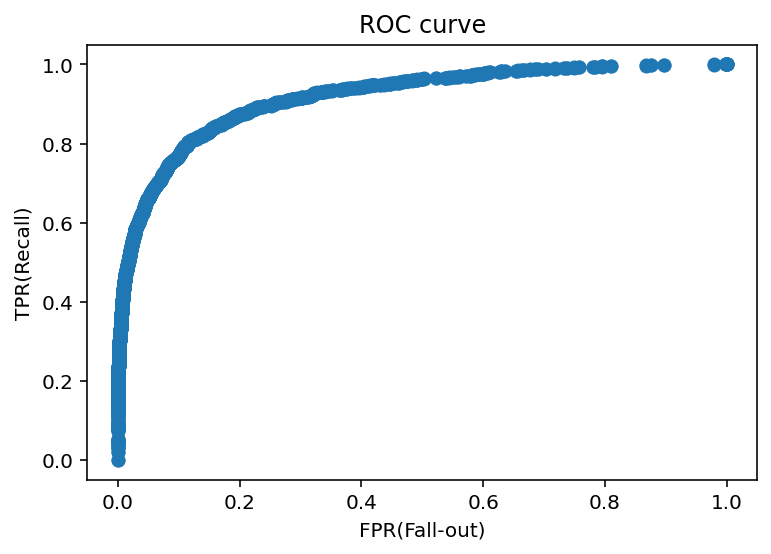

In [ ]:
# 시각화 
plt.scatter(fpr3, tpr3)
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)')

In [ ]:
# 최적의 threshold 찾기
# threshold 최대값의 인덱스, np.argmax()
optimal_idx3 = np.argmax(tpr3 - fpr3)
optimal_threshold3 = thresholds3[optimal_idx3]

print('idx:', optimal_idx3, ', threshold:', optimal_threshold3)

idx: 1632 , threshold: 0.009397022247909734


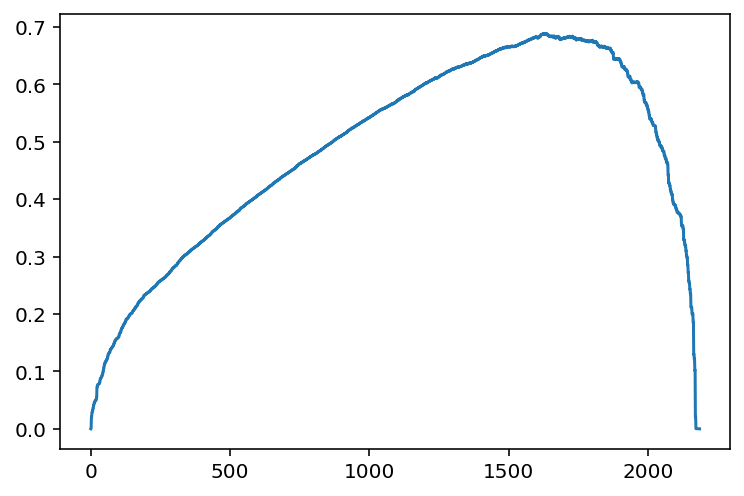

In [ ]:
# 시각화 
plt.plot(tpr3-fpr3);

In [ ]:
# 최적의 임계치로 예측한 y값에 대한 score report 출력
y_pred_optimal3 = y_pred_proba3 >= optimal_threshold3
print(classification_report(y_val, y_pred_optimal3))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94    176631
           1       0.05      0.81      0.09      1355

    accuracy                           0.88    177986
   macro avg       0.52      0.84      0.51    177986
weighted avg       0.99      0.88      0.93    177986



In [ ]:
# 예측값 확인
y_pred_optimal3

array([False, False,  True, ..., False,  True, False])

In [ ]:
## AUC점수가 높을수록 이진분류문제에서 예측 정확도 높음
auc_score3 = roc_auc_score(y_val, y_pred_proba3)
auc_score3

0.9177544881075798

(1)
0.9016482650282673

(2)
0.898602921385713

* 0.9038511986609585

* 0.8956505102353977

* 0.9033739895460678

### 시각화(특성 중요도)

In [ ]:
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rc("font", family='NanumMyeongjo') #나눔명조로 지정
mpl.rc('axes', unicode_minus=False) #마이너스값 허용

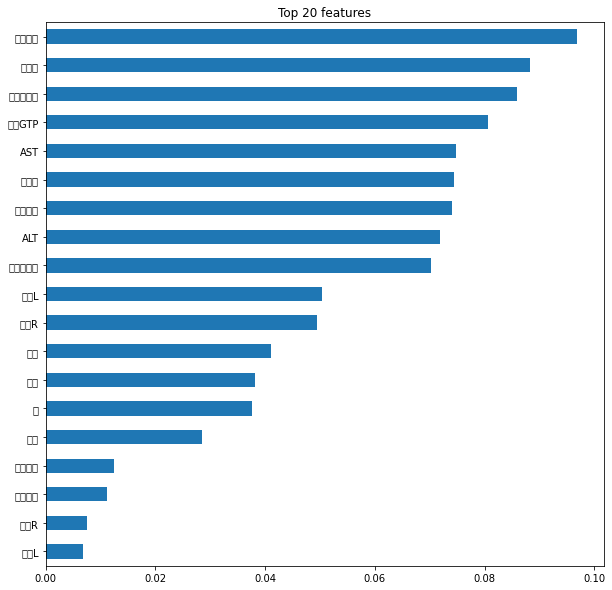

In [ ]:
%matplotlib inline

# 특성 중요도
rf = pipe3.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh();

- 위 그래프의 한글깨짐 현상을 해결하려면 런타임 다시시작을 해야하고, 모델학습을 다시 시켜야해서(2시간...) 글자수로 특성 중요도를 유추해보기로 한다.  

### 시각화(PDP)

In [ ]:
!pip install pdpbox

In [ ]:
# 트리모델 : 부분의존그림(Partial dependence plots) 사용
from pdpbox.pdp import pdp_isolate, pdp_plot # (1특성 사용)
from pdpbox.pdp import pdp_interact, pdp_interact_plot # (2특성 사용)

# dpi(dots per inch) 수치를 조정해 이미지 화질 조정
plt.rcParams['figure.dpi'] = 144

In [ ]:
feature = '공복혈당'

In [ ]:
# 1특성 사용
isolated = pdp_isolate(
    model= pipe3, 
    dataset= X_val, 
    model_features=X_val.columns, 
    feature=feature
)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


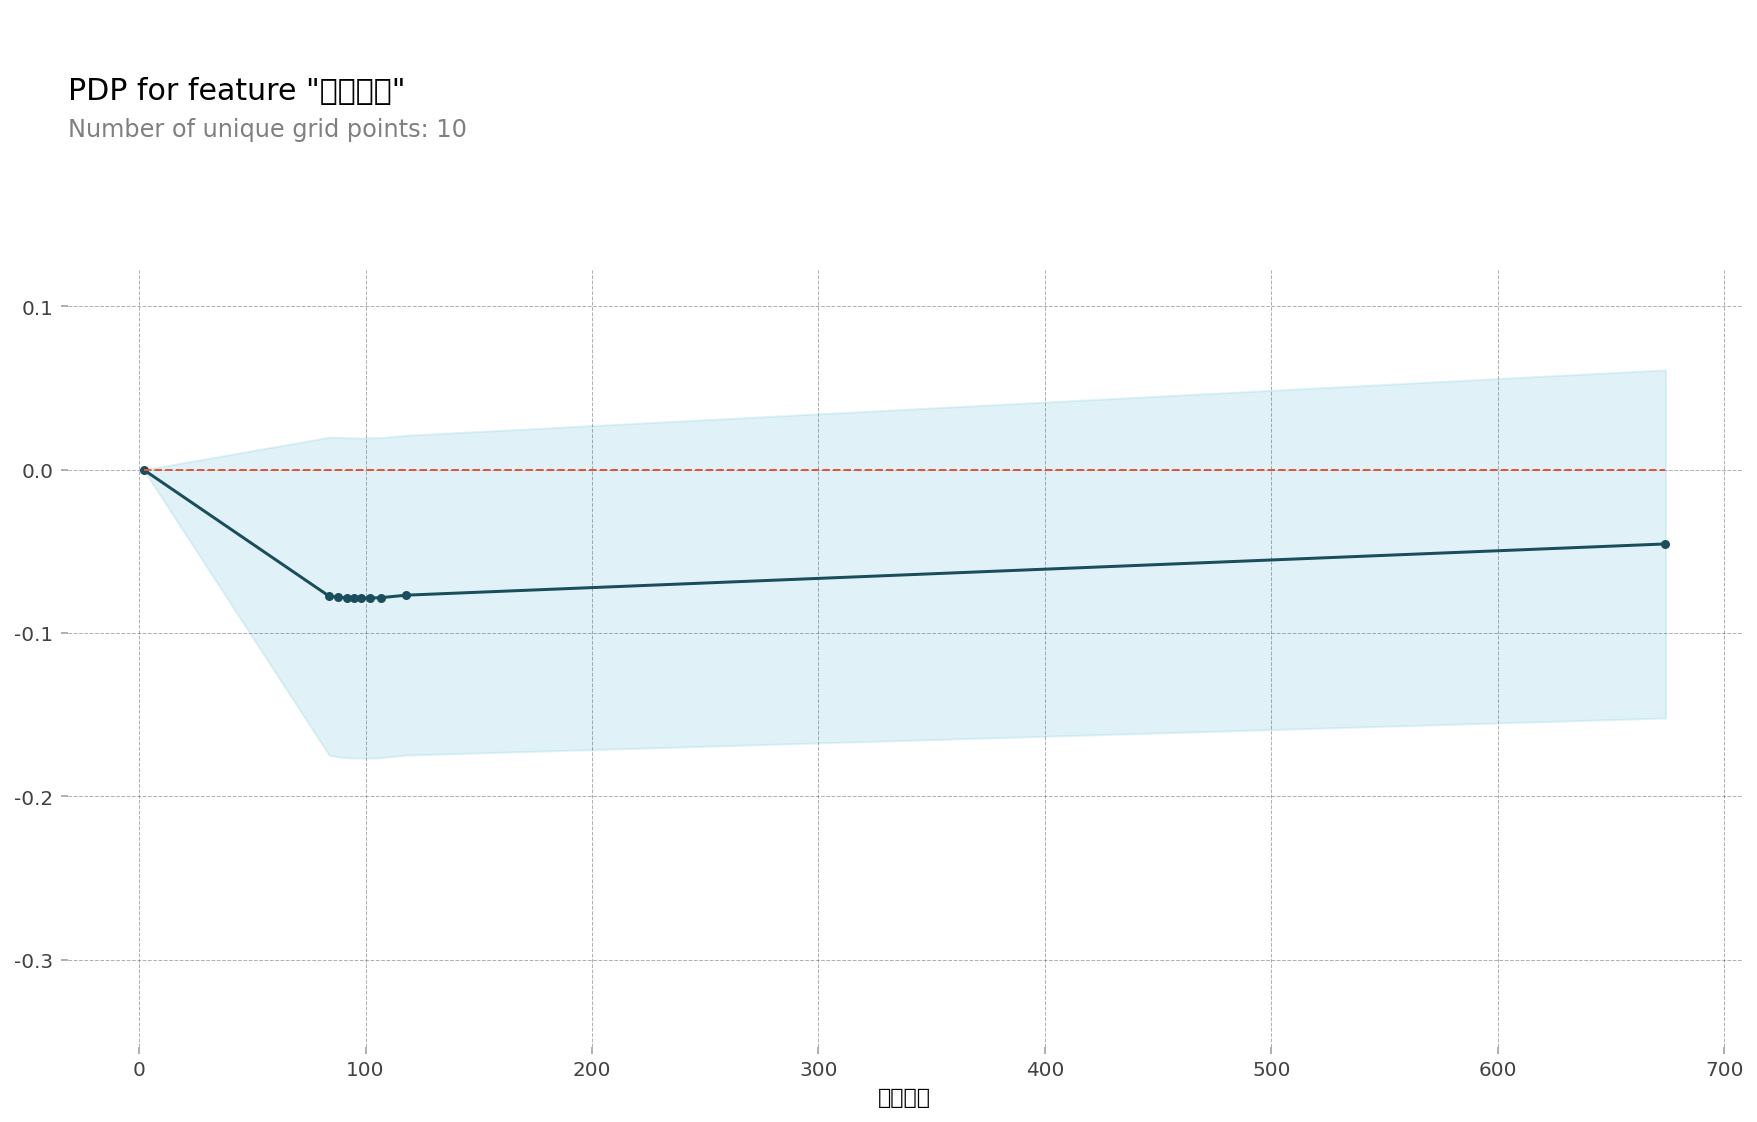

In [ ]:
pdp_plot(isolated, feature_name=feature);

In [ ]:
# 2특성 사용
features = ['공복혈당', '이완기혈압']

interaction = pdp_interact(
    model=pipe3, 
    dataset=X_val,
    model_features=X_val.columns, 
    features=features
)

- 런타임 연결이 끊어짐 ㅠㅠ

In [ ]:
pdp_interact_plot(interaction, plot_type='grid', 
                  feature_names=features);

# 5. 결과요약 및 제안(의사결정)

In [ ]:
train.columns

Index(['성별', '나이', '키', '체중', '허리둘레', '시력L', '시력R', '청력L', '청력R', '수축기혈압',
       '이완기혈압', '공복혈당', '혈색소', '요단백', 'AST', 'ALT', '감마GTP', '흡연상태', '음주여부',
       'cr'],
      dtype='object')


<1~7위>

공복혈당 / 요단백 / 이완기혈압 / 감마GTP / AST / 혈색소 / 음주여부

---
ALT / 수축기 혈압 / 시력L / 시력R / (성별/나이) / 키 / 체중(추측) / 허리둘레 / 흡연상태 / 청력R / 청력L 

- **가설 : "시력/혈압/혈당/간기능/흡연유무가 신장기능에 Negative한 영향을 미칠것이다"** 
> **=> 혈압/혈당/간기능이 신장기능에 유의미한 영향을 미친다.**
>
> **(추가적으로 요단백, 혈색소, 음주여부도)** 

# 6. 아이디어 확장 
> 혈청 크레아티닌 수치 계산식(MDRD 공식)을 사용하여 사구체 여과율로 환산해 신장기능이 정상범주인지 아닌지를 알려줌

- 신장기능 지표==사구체여과율. 즉 사구체여과율 계산을 통해 신장기능을 확인
- MDRD 공식으로 나이, 키, 성별(근육량측정을위해), 혈청크레아티닌 수치를 사용하여 **사구체여과율(GFR) 계산**을 통해 신장기능을 확인하고자 한다
- MDRD 공식은 미국에 거주하는 수천 명의 백인 및 흑인 신장병 환자를 대상으로 연구하여 나온 것으로, **나이, 성별, 인종 및 혈청크라아티닌 농도를 알면 사구체여과율을 쉽게 구할 수 있게 해준 공식**이다.
> * MDRD 공식 
>
>                      (140 - age)  x  lean body weight [kg]
>CCr (mL/min)  =  ————————————————————————————————
>                         Cr [mg/dL]  x  72
>
>이 공식은 Cr(크레아티닌) 생산이 나이가 듦에 따라 감소하고 체중이 많을수록 더 크다는 가정을 고려한 것
>
> 여성에서는 남자보다 근육량이 더 적으므로 0.85를 곱한다


In [ ]:
# MDRD 계산 
# 입력값(나이,체중,혈청크레아티닌,성별)
# 남자==1, 여자==2


def mdrd(age, weight, cr, se):
  if se == 1:
    ccr1 = ( (140-age) * weight ) / ( cr * 72 )
    return ccr1
  elif se == 2: 
    ccr2 = ( (140-age) * weight ) * 0.85 / ( cr * 72 )
    return ccr2
  else:
    print('입력값을 확인해주세요(에러)')

In [ ]:
# 예시) 24살, 50kg, 0.9, 2
mdrd(24, 50, 0.9, 2)

76.08024691358025

사구체여과율에 따라서 만성신부전증이 5단계로 나뉘는데(CKD 1~5)
- 1 ~ 2단계까지 무증상이므로 조기검사와 관리가 필요한 단계로 봐서 '0' 클래스로 분류한다 **(GFR : 60 mL/min/1.73m2 이상)**
- 3단계까지도 대부분 무증상 환자이지만, 3 ~ 5단계는 건강에 문제가 생겨 치료를 받아야하는 단계로 봐서 '1' 클래스로 분류한다 **(GFR : 59 mL/min/1.73m2 이하)**

In [ ]:
# '사구체여과율(GFR)' 특성 생성 > 신장수치 정밀검사 추천

def recc(mdrd_result):
  if mdrd_result >= 90:
    print('신장기능 정상 ~ 만성 신부전증 1단계입니다')
  elif mdrd_result >= 60:
    print('위험!! 만성 신부전증 2단계입니다. 조기 검사와 관리가 필요합니다')
  elif mdrd_result >= 30:
    print('위험!!! 만성 신부전증 3단계입니다')
  elif mdrd_result >= 15:
    print('위험!!!! 만성 신부전증 4단계입니다')
  else:
    print('위험!!!! 만성 신부전증 5단계입니다')

In [ ]:
# 예시) 위에서 구한 ccr2값(= mdrd_result) 사용
recc(mdrd(24, 50, 0.9, 2))

위험!! 만성 신부전증 2단계입니다. 조기 검사와 관리가 필요합니다
